## 1. Introduction

In the past few missions, you've learned how to use Pandas to analyze data quickly and efficiently. You applied this knowledge by creating guided projects to solidify your knowledge. You'll go further in this project, and you'll build an end-to-end data analysis project on your own, using Pandas and Python.

## 2. The data

In this project, you'll be working with crime data from [Montgomery County, MD](https://en.wikipedia.org/wiki/Montgomery_County,_Maryland). Each row in the data is a crime reported by a law enforcement officer in <span style="background-color: #F9EBEA; color:##C0392B">2013</span> and entered into a database.

You'll want to download the data from the repository. After downloading the data, you'll want to create a new Jupyter notebook in the same folder, and ensure that any code or analysis you do on the data occurs in that notebook.

You can load the data in and display the first <span style="background-color: #F9EBEA; color:##C0392B">5</span> rows to get a better idea of the structure:

>```python
import pandas as pd
crimes = pd.read_csv("MontgomeryCountyCrime2013.csv")
crimes.head()
```

You'll also want to display all of the column names with:

>```python
crimes.columns
```
>```python
Index(['Incident ID', 'CR Number', 'Dispatch Date / Time', 'Class',
       'Class Description', 'Police District Name', 'Block Address', 'City',
       'State', 'Zip Code', 'Agency', 'Place', 'Sector', 'Beat', 'PRA',
       'Start Date / Time', 'End Date / Time', 'Latitude', 'Longitude',
       'Police District Number', 'Location', 'Address Number'],
      dtype='object')
```

After displaying some of the data, make sure you look through and understand each column. It can be helpful to display the first few values in each column in order to understand it better. It can also be useful to perform a Google search to help give you context for columns. For example, looking up <span style="background-color: #F9EBEA; color:##C0392B">Police District Number Montgomery County</span> bring you to this [page](https://www.montgomerycountymd.gov/pol/districts/map.html), which helps you understand them. <b>Make sure to write up a Markdown cell explaining anything relevant that you learned.</b>

You'll also want to explore missing values in each column. <b>Why do you think certain columns have missing values? Make sure to write up your thoughts on missing values, and how they'll impact your analysis.</b>

Also make sure to look at the format of each column. For example, <span style="background-color: #F9EBEA; color:##C0392B">Zip Code</span> is a float column, but if you know about Zip codes in the US, you know that they're always integers. Keeping that this column is of the "wrong" type in mind will help you as you analyze the data.

Seção #1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import arange
crimes = pd.read_csv("MontgomeryCountyCrime2013.csv")
# Listagem dos primeiros registros da fonte de dados        
crimes.head()

,Incident ID,CR Number,Dispatch Date / Time,Class,Class Description,Police District Name,Block Address,City,State,Zip Code,...,Sector,Beat,PRA,Start Date / Time,End Date / Time,Latitude,Longitude,Police District Number,Location,Address Number
0,200939101,13047006,10/02/2013 07:52:41 PM,511,BURG FORCE-RES/NIGHT,OTHER,25700 MT RADNOR DR,DAMASCUS,MD,20872.0,...,NaN,NaN,NaN,10/02/2013 07:52:00 PM,NaN,NaN,NaN,OTHER,NaN,25700.0
1,200952042,13062965,12/31/2013 09:46:58 PM,1834,CDS-POSS MARIJUANA/HASHISH,GERMANTOWN,GUNNERS BRANCH RD,GERMANTOWN,MD,20874.0,...,M,5M1,470.0,12/31/2013 09:46:00 PM,NaN,NaN,NaN,5D,NaN,NaN
2,200926636,13031483,07/06/2013 09:06:24 AM,1412,VANDALISM-MOTOR VEHICLE,MONTGOMERY VILLAGE,OLDE TOWNE AVE,GAITHERSBURG,MD,20877.0,...,P,6P3,431.0,07/06/2013 09:06:00 AM,NaN,NaN,NaN,6D,NaN,NaN
3,200929538,13035288,07/28/2013 09:13:15 PM,2752,FUGITIVE FROM JUSTICE(OUT OF STATE),BETHESDA,BEACH DR,CHEVY CHASE,MD,20815.0,...,D,2D1,11.0,07/28/2013 09:13:00 PM,NaN,NaN,NaN,2D,NaN,NaN
4,200930689,13036876,08/06/2013 05:16:17 PM,2812,DRIVING UNDER THE INFLUENCE,BETHESDA,BEACH DR,SILVER SPRING,MD,20815.0,...,D,2D3,178.0,08/06/2013 05:16:00 PM,NaN,NaN,NaN,2D,NaN,NaN


Seção #2

In [2]:
# Listagem das colunas contidas na fonte de dados
crimes.columns

Index(['Incident ID', 'CR Number', 'Dispatch Date / Time', 'Class',
       'Class Description', 'Police District Name', 'Block Address', 'City',
       'State', 'Zip Code', 'Agency', 'Place', 'Sector', 'Beat', 'PRA',
       'Start Date / Time', 'End Date / Time', 'Latitude', 'Longitude',
       'Police District Number', 'Location', 'Address Number'],
      dtype='object')

Descrições sobre a maioria das colunas:
https://www.opendatanetwork.com/dataset/data.montgomerycountymd.gov/icn6-v9z3

Incident ID = Police Incident Number

CR Number = Police Report Number

Dispatch Date / Time = The actual date and time a Officer was dispatched

Class = (Código da Classe do Crime)

Class Description = (Descrição da Classe do Crime)

Police District Name = Name of District (Rockville, Wheaton etc.)

Block Address = (Esta coluna parece contar o número e o logradouro, ou apenas o logradouro, de onde ocorreu o crime)

City = City

State = State

ZIP Code = ZIP Code

Agency = Assigned Police Department

Place = Place description

Sector = Police sector name, a subset of District

Beat = Police patrol area, a subset of Sector

PRA = Police Response Area, a subset of Beat

Start Date / Time = Occurred from date/time

End Date / Time = Occurred to date/time

Latitude = Latitude

Longitude = Longitude

Police District Number = Major Police Boundary

Location = (Combinação de Latitude e Longitude)

Address Number = (Número do Logradouro)

Um Distrito é dividido em Setores. Um Setor é dividido em Beats. Um Beat é dividido em PRAs (Police Response Areas).
Mapa ilustrativo:
http://mcgov-gis.maps.arcgis.com/apps/Viewer/index.html?appid=4317830a05654b8f907e65515970a5ba

Distritos policiais do Condado de Montgomery:
https://www.montgomerycountymd.gov/pol/districts/map.html

Distrito 1 - Rockville<br>
Distrito 2 - Bethesda<br>
Distrito 3 - Silver Spring<br>
Distrito 4 - Wheaton<br>
Distrito 5 - Germantown<br>
Distrito 6 - Montgomery Village<br>

Definição de 'Beat' (área de patrulhamento policial):
https://en.wikipedia.org/wiki/Beat_(police)

PRA = Police Response Area

A coluna 'Block Address' parece conter um número e um logradouro (p.ex. '12000 SMOKETREE RD'), ou apenas um logradouro ('GUNNERS BRANCH RD').

Agências (Departamentos Policiais) possíveis:

GPD = Gaithersburg City Polie<br>
MCFM = Montgomery County Fire Marshal<br>
MCPD = Montgomery County Police Department<br>
P = ?<br>
RCPD = Rockville City Police Department<br>

As colunas 'ZIP Code', 'Sector', 'Beat', 'PRA', 'End Date / Time', 'Latitude', 'Longitude', 'Location' e 'Address Number' às vezes apresentam valores vazios.

Todas estas colunas, com exceção de 'End Date / Time', referem-se ao local do crime. Embora o distrito em que o crime ocorreu esteja sempre disponível (coluna 'Police District Name'), as demais colunas oferecem melhor granularidade. Quando estão indisponíveis, isso diminui o nível de detalhe com que se pode fazer o mapeamento entre locais e classes de crime.

É interessante notar que a coluna 'Beat' tem menos valores vazios do que a coluna 'Sector'. Mas, como um Setor é dividido em Beats, quando um Setor está vazio é possível determiná-lo caso o Beat esteja disponível.

Às vezes a coluna 'Address Number' está vazia, o que parece se aplicar aos casos em que o crime não ocorreu num endereço específico. Por exemplo, a ocorrência pode ter acontecido no meio de uma rua ou avenida. Porém, como a coluna 'Block Address' está sempre preenchida, sabemos pelo menos o logradouro onde ocorreu o crime.

## 3. Analyzing the times of crimes
A coluna 'End Date / Time' se refere à data/hora de encerramento do crime. Quando ela está vazia, podemos usar algumas estratégias para tentar definir um valor 'razoável' para ela:

- Aplicar a duração média de um crime para aquela região e aquela classe;
- Aplicar a duração média de um crime para aquela classe (i.e. para o condado inteiro).


In [3]:
# Consulta a data/hora de envio de policiais para cada ocorrência
#crimes['Dispatch Date / Time']

# Consulta a data/hora de envio de policiais para a primeira ocorrência
crimes.iloc[0]['Dispatch Date / Time']

'10/02/2013 07:52:41 PM'

In [4]:
# Gera uma Série do Pandas contendo as datas/horas de envio de policiais para cada ocorrência.
# Cada elemento da Série será do tipo datetime64[ns].
d_time = pd.to_datetime(crimes["Dispatch Date / Time"])
#print(d_time)

In [5]:
# Quantos elementos tem a Série d_time?
d_time.shape

(23369,)

In [6]:
# Qual é o mês da data/hora de envio de policiais para a primeira ocorrência?
d_time[0].month

10

## 4. Analyzing locations of crimes

There are a few columns that encode information about the location of crimes:

- <span style="background-color: #F9EBEA; color:##C0392B">Police District Name</span>
- <span style="background-color: #F9EBEA; color:##C0392B">Block Address</span>
- <span style="background-color: #F9EBEA; color:##C0392B">Zip Code</span>
- <span style="background-color: #F9EBEA; color:##C0392B">Sector</span>
- <span style="background-color: #F9EBEA; color:##C0392B">Beat</span>
- <span style="background-color: #F9EBEA; color:##C0392B">Latitude</span>
- <span style="background-color: #F9EBEA; color:##C0392B">Longitude</span>
- <span style="background-color: #F9EBEA; color:##C0392B">Police District Number</span>
- <span style="background-color: #F9EBEA; color:##C0392B">Location</span>
- <span style="background-color: #F9EBEA; color:##C0392B">Address Number</span>

These columns have varying numbers of missing values, and varying granularity. Some of the columns represent areas with large granularity (like police districts), whereas some represent areas with small granularity, like <span style="background-color: #F9EBEA; color:##C0392B">Latitude</span>, and <span style="background-color: #F9EBEA; color:##C0392B">Longitude</span>.


In order to decide which column to use to analyze the locations of crimes, you need to utilize the following criteria:

- **Granularity**. Areas that are too small aren't great, because only a few crimes were committed inside them, which makes it hard to analyze and compare. For example, if I tell you that Silver Spring (a city in Montgomery County) is the place with the most crimes, you'll know to avoid that area. However, if I tell you that a 100 foot section of Silver Spring has the most crimes, it won't be as helpful (it's unlikely that you'll ever be in that 100 foot section).
- **Comprehensibility**. You looked up the Police District map of Montgomery County before, so it's simple to tell what area corresponds to district <span style="background-color: #F9EBEA; color:##C0392B">6</span>. <b>However, what area does Beat <span style="background-color: #F9EBEA; color:##C0392B">5M1</span> correspond to? You may be able to look this up, but it's harder to comprehend.</b>
- **Missing values**. If a column has a lot of missing values, that means that the conclusions you draw are less valid, because you don't know if the missing data is systematic (ie all data for a given district is missing) or random (equal amounts of data are missing from each district). <b>You should try to select a column that has minimal missing values.</b>




<b><tt><font size=+2>Sector Designations &amp; Other District Info:</font></tt></b>

<ul>A <a href="http://www.co.mo.md.us/services/police/district.htm">map of 
the police districts</a> is available from the Montgomery County 
Department of Police. The county Web site has a police <A
HREF="http://gis.co.mo.md.us/gis/images/gallery/pbeats.gif">beat map</A> 
on-line as well.

<p><i><u><font size=+1>Rockville District</font></u></i> (Sectors A, B, C)
<p><b>A</b>dam sector is the eastern portion of the district, primarily
the city limits of Rockville east of I-270 and some immediately surrounding
areas to the north and east (including a majority of the Derwood area,
south of Shady Grove Road and west of Muncaster Mill Road); sergeant is
Adam-10; corporal is Adam-11; beats are numbered 1-4, in ascending order
from south to north (Adam-1, Twinbrook/Viers Mill; Adam-2, Twinbrook/east
Rockville; Adam-3, central Rockville; Adam-4, north Rockville and
Derwood).&nbsp; Adam-3x units make up the Adam-3 beat team (Lincoln Park
substation).

<p><b>B</b>aker sector is the western portion of the district plus a portion
of southwest Rockville, but primarily the Potomac area; beats are numbered
1-4 (Baker-1, south central Rockville city; Baker-2, Rockville City west
of I-270; Baker-3, Potomac-south; Baker-4, Potomac-west).

<p><b>C</b>harlie sector is a pseudo-sector designating Rockville City
Police units.&nbsp; Rockville City Police units are dispatched by
the county dispatcher on channel 1 for all their calls.  However,
they continue to have their own channel and city dispatcher on channel 9.

<p><i><u><font size=+1>Bethesda District</font></u></i> (Sectors D, E)

<p><b>D</b>elta sector is the eastern portion of the district, including
downtown Bethesda.  Beats are numbered 1-3.

<p><b>E</b>dward sector is the northern and western portion of the district,
including the White Flint area. Beats are numbered 1-4.

<p><b>M</b>ary (shift 9) units on channel 2 are Chevy Chase Village Police
units.&nbsp; 9-Mary units are dispatched by the county dispatcher on 911
calls that occur within the village.&nbsp; Their jurisdiction extends north
from Chevy Chase Circle (at the DC line) to Bradley Lane (about 1/2 mile)
and west from Wisconsin Avenue to Chevy Chase Section 3 (about 9 miles
of road in total).&nbsp; They usually have one officer and one dispatcher/call-taker
on-duty.&nbsp; They use the same 10-codes and activity codes as the county
police.&nbsp; The on-duty officer usually has the vehicle radio on county
police channel 2 and his/her portable radio on the CCVP frequency.
<p><i><u><font size=+1>Silver Spring District</font></u></i> (Sector G)
<p><b>G</b>eorge sector composes the entire district (the Henry sector 
was eliminated and combined with George in early 2001).  Beats are 
numbered 1-5.
<p><i><u><font size=+1>Wheaton-Glenmont District</font></u></i> (Sectors
J, K)
<p><b>J</b>ohn sector is the northern portion of the district.&nbsp; John-2
beat is the Aspen Hill area.&nbsp; John-3 beat includes Olney, Airpark,
and the portion of Derwood east of Muncaster Mill Road.&nbsp; John-4
beat is the Brookeville area.  John-3x
units make up the John-3 beat team (Olney substation).&nbsp; Beats are
numbered 1-4.
<p><b>K</b>ing sector is the southern portion of the district, including
Wheaton and Glenmont.&nbsp; Beats are numbered 1-4.
<p><i><u><font size=+1>Germantown District</font></u></i> (Sectors M, N,
P)
<p><b>M</b>ary sector is the portion of the district east of I-270,
including Germantown (part), Damascus, and Laytonsville.  Beats are
numbered 1-2, in increasing order from west to east.
<p><b>N</b>ancy sector is the portion of the district west of Interstate
270, including Germantown (part) and Poolesville. Beats are numbered 1-3, 
in increasing order from east to west.
<p><b>P</b>aul sector includes the Gaithersburg and Montgomery Village
areas.  It makes up the area assigned to the &quot;6th District
Substation.&quot;  Eventually it will become a sector in the future 6th
police district.  Beats are numbered 1-6 with beats 1-2 west of I-270 and
beats 3-6 east of I-270.
<p><b>D</b>elta (shift 9) units are Gaithersburg City Police
units.&nbsp; Gaithersburg City Police units are dispatched on channel 5
by the county dispatcher for all their calls.</ul>

Based on the above criteria, pick a column that you want to use to analyze location. After picking a column, see if you can answer these questions:
<b>
- In what area did the most crimes occur? What physical locations (like cities) does this area correspond to?
- Which area has the highest number of crimes per capita? You may be able to find population data per area online. </b>For example, [this](https://www.montgomerycountymd.gov/POL/Resources/Files/crime/MCP2015AnnualCrimeReportFINAL.pdf) annual report has per-district populations towards the bottom.

Make sure to write up the answers to these questions, along with your code, and explain why you reached the conclusions you did.

In [7]:
#crimes.head(30)

In [8]:
print('How many NaNs are in Police District Name? %d' % len(crimes[crimes['Police District Name'].isnull()]))
print('How many NaNs are in Block Address? %d' % len(crimes[crimes['Block Address'].isnull()]))
print('How many NaNs are in Zip Code? %d' % len(crimes[crimes['Zip Code'].isnull()]))
print('How many NaNs are in Sector? %d' % len(crimes[crimes['Sector'].isnull()]))
print('How many NaNs are in Beat? %d' % len(crimes[crimes['Beat'].isnull()]))
print('How many NaNs are in Latitude? %d' % len(crimes[crimes['Latitude'].isnull()]))
print('How many NaNs are in Longitude? %d' % len(crimes[crimes['Longitude'].isnull()]))
print('How many NaNs are in Police District Number? %d' % len(crimes[crimes['Police District Number'].isnull()]))
print('How many NaNs are in Location? %d' % len(crimes[crimes['Location'].isnull()]))     
print('How many NaNs are in Address Number? %d' % len(crimes[crimes['Address Number'].isnull()]))     

How many NaNs are in Police District Name? 0
How many NaNs are in Block Address? 0
How many NaNs are in Zip Code? 30
How many NaNs are in Sector? 46
How many NaNs are in Beat? 8
How many NaNs are in Latitude? 161
How many NaNs are in Longitude? 161
How many NaNs are in Police District Number? 0
How many NaNs are in Location? 161
How many NaNs are in Address Number? 132


We'll use <b>Beat</b> to analyze crime locations, because it has reasonable granularity, has just a few missing values and is the same criterion used in the Crime Summary of Montgomery County, MA.

In [9]:
print('Crimes occurred in Beat 1B3 were %d' % len(crimes.loc[crimes['Beat'] == '1B3']))

Crimes occurred in Beat 1B3 were 129


In [10]:
crimes['Beat'].describe()

count     23361
unique       42
top         3G1
freq       1544
Name: Beat, dtype: object

In [11]:
crimes['Block Address'].describe()

count                    23369
unique                    8143
top       11100  VEIRS MILL RD
freq                       291
Name: Block Address, dtype: object

In [12]:
crimes['Police District Name'].describe()

count             23369
unique                8
top       SILVER SPRING
freq               5533
Name: Police District Name, dtype: object

<b>1D - ROCKVILLE, MD, 20878</b>

Population: 149,118<br>
2015 Calls for Service: 32,101<br>
Crime Rate per capita: 4404.6/100,000<br>

In [13]:
len(crimes.loc[crimes['Police District Name'] == 'ROCKVILLE'])

3480

In [14]:
locate = {}

In [15]:
#locate = {}
#for beat in crimes['Beat']:
    #print('Crimes occur in Beat %s was %d' % (beat, len(crimes.loc[crimes['Beat'] == beat])))
    #locate = np.append(locate,{beat: len(crimes.loc[crimes['Beat'] == beat])})

In [16]:
#for beat in crimes['Beat']:
    #print('Crimes occur in Beat %s was %d' % (beat, len(crimes.loc[crimes['Beat'] == beat])))
    #locate[beat] = {beat: len(crimes.loc[crimes['Beat'] == beat])}

In [17]:
beat = '1A1'
print('Crimes occurred in Beat %s were %d' % (beat, len(crimes.loc[crimes['Beat'] == beat])))
locate = {beat: len(crimes.loc[crimes['Beat'] == beat])}

Crimes occurred in Beat 1A1 were 477


In [18]:
beat = '1A2'
#print('Crimes occurred in Beat %s were %d' % (beat, len(crimes.loc[crimes['Beat'] == beat])))
locate = np.append(locate,{beat: len(crimes.loc[crimes['Beat'] == beat])})

In [19]:
beat = '1A3'
#print('Crimes occurred in Beat %s were %d' % (beat, len(crimes.loc[crimes['Beat'] == beat])))
locate = np.append(locate,{beat: len(crimes.loc[crimes['Beat'] == beat])})

In [20]:
beat = '1A4'
#print('Crimes occurred in Beat %s were %d' % (beat, len(crimes.loc[crimes['Beat'] == beat])))
locate = np.append(locate,{beat: len(crimes.loc[crimes['Beat'] == beat])})

In [21]:
beat = '1B1'
#print('Crimes occurred in Beat %s were %d' % (beat, len(crimes.loc[crimes['Beat'] == beat])))
locate = np.append(locate,{beat: len(crimes.loc[crimes['Beat'] == beat])})
#locate

In [22]:
beat = '1B2'
#print('Crimes occurred in Beat %s were %d' % (beat, len(crimes.loc[crimes['Beat'] == beat])))
locate = np.append(locate,{beat: len(crimes.loc[crimes['Beat'] == beat])})
#locate

In [23]:
beat = '1B3'
#print('Crimes occurred in Beat %s were %d' % (beat, len(crimes.loc[crimes['Beat'] == beat])))
locate = np.append(locate,{beat: len(crimes.loc[crimes['Beat'] == beat])})
#locate

In [24]:
#beatMajor = beat
#for beat in crimes['Beat']:
 #   print('Crimes occur in Beat %s was %d' % (beat, len(crimes.loc[crimes['Beat'] == beat])))
  #  beatMajor = {beat: len(crimes.loc[crimes['Beat'] == beat])}
    #beat_count = len(crimes.loc[crimes['Beat'] == beat])
    #def fraction_votes_filter(x):
    #    return x['votes'].sum() > 1000000
#df.groupby('Beat').filter(fraction_votes_filter)

<b>2D - Bethesda, MD 20814</b>

Population: 182,883<br>
2015 Calls for Service: 31,710<br>
Crime Rate per capita: 3919.4/100,000

In [25]:
len(crimes.loc[crimes['Police District Name'] == 'BETHESDA'])

3383

In [26]:
beat = '2D1'
#print('Crimes occurred in Beat %s were %d' % (beat, len(crimes.loc[crimes['Beat'] == beat])))
locate = np.append(locate,{beat: len(crimes.loc[crimes['Beat'] == beat])})

In [27]:
beat = '2D2'
#print('Crimes occurred in Beat %s were %d' % (beat, len(crimes.loc[crimes['Beat'] == beat])))
locate = np.append(locate,{beat: len(crimes.loc[crimes['Beat'] == beat])})
#locate

In [28]:
beat = '2D3'
#print('Crimes occurred in Beat %s were %d' % (beat, len(crimes.loc[crimes['Beat'] == beat])))
locate = np.append(locate,{beat: len(crimes.loc[crimes['Beat'] == beat])})
#locate

In [29]:
beat = '2D4'
#print('Crimes occurred in Beat %s were %d' % (beat, len(crimes.loc[crimes['Beat'] == beat])))
locate = np.append(locate,{beat: len(crimes.loc[crimes['Beat'] == beat])})
#locate

In [30]:
beat = '2E1'
#print('Crimes occurred in Beat %s were %d' % (beat, len(crimes.loc[crimes['Beat'] == beat])))
locate = np.append(locate,{beat: len(crimes.loc[crimes['Beat'] == beat])})
#locate

In [31]:
beat = '2E2'
#print('Crimes occurred in Beat %s were %d' % (beat, len(crimes.loc[crimes['Beat'] == beat])))
locate = np.append(locate,{beat: len(crimes.loc[crimes['Beat'] == beat])})
#locate

In [32]:
beat = '2E3'
#print('Crimes occurred in Beat %s were %d' % (beat, len(crimes.loc[crimes['Beat'] == beat])))
locate = np.append(locate,{beat: len(crimes.loc[crimes['Beat'] == beat])})
#locate

In [33]:
beat = '3H1'
#print('Crimes occurred in Beat %s were %d' % (beat, len(crimes.loc[crimes['Beat'] == beat])))
locate = np.append(locate,{beat: len(crimes.loc[crimes['Beat'] == beat])})
#locate

<b>3D - Silver Spring, MD 20904</b>

Population: 152,991<br>
2015 Calls for Service: 42,635<br>
Crime Rate per capita: 7374.9/100,000

In [34]:
len(crimes.loc[crimes['Police District Name'] == 'SILVER SPRING'])

5533

In [35]:
beat = '3G1'
#print('Crimes occurred in Beat %s were %d' % (beat, len(crimes.loc[crimes['Beat'] == beat])))
locate = np.append(locate,{beat: len(crimes.loc[crimes['Beat'] == beat])})
#locate

In [36]:
beat = '3G2'
#print('Crimes occurred in Beat %s were %d' % (beat, len(crimes.loc[crimes['Beat'] == beat])))
locate = np.append(locate,{beat: len(crimes.loc[crimes['Beat'] == beat])})
#locate

In [37]:
beat = '3H1'
#print('Crimes occurred in Beat %s were %d' % (beat, len(crimes.loc[crimes['Beat'] == beat])))
locate = np.append(locate,{beat: len(crimes.loc[crimes['Beat'] == beat])})
#locate

In [38]:
beat = '3H2'
#print('Crimes occurred in Beat %s were %d' % (beat, len(crimes.loc[crimes['Beat'] == beat])))
locate = np.append(locate,{beat: len(crimes.loc[crimes['Beat'] == beat])})
#locate

In [39]:
beat = '3I1'
#print('Crimes occurred in Beat %s were %d' % (beat, len(crimes.loc[crimes['Beat'] == beat])))
locate = np.append(locate,{beat: len(crimes.loc[crimes['Beat'] == beat])})
#locate

In [40]:
beat = '3I2'
#print('Crimes occurred in Beat %s were %d' % (beat, len(crimes.loc[crimes['Beat'] == beat])))
locate = np.append(locate,{beat: len(crimes.loc[crimes['Beat'] == beat])})
#locate

<b>4D - Wheaton, MD 20902</b>

Population: 208,263<br>
2015 Calls for Service: 41,104<br>
Crime Rate per capita: 4909.2/100,000<br>

In [41]:
len(crimes.loc[crimes['Police District Name'] == 'WHEATON'])

4375

In [42]:
beat = '4J1'
#print('Crimes occurred in Beat %s were %d' % (beat, len(crimes.loc[crimes['Beat'] == beat])))
locate = np.append(locate,{beat: len(crimes.loc[crimes['Beat'] == beat])})
#locate

In [43]:
beat = '4J2'
#print('Crimes occurred in Beat %s were %d' % (beat, len(crimes.loc[crimes['Beat'] == beat])))
locate = np.append(locate,{beat: len(crimes.loc[crimes['Beat'] == beat])})
#locate

In [44]:
beat = '4K1'
#print('Crimes occurred in Beat %s were %d' % (beat, len(crimes.loc[crimes['Beat'] == beat])))
locate = np.append(locate,{beat: len(crimes.loc[crimes['Beat'] == beat])})
#locate

In [45]:
beat = '4K2'
#print('Crimes occurred in Beat %s were %d' % (beat, len(crimes.loc[crimes['Beat'] == beat])))
locate = np.append(locate,{beat: len(crimes.loc[crimes['Beat'] == beat])})
#locate

In [46]:
beat = '4L1'
#print('Crimes occurred in Beat %s were %d' % (beat, len(crimes.loc[crimes['Beat'] == beat])))
locate = np.append(locate,{beat: len(crimes.loc[crimes['Beat'] == beat])})
#locate

In [47]:
beat = '4L2'
#print('Crimes occurred in Beat %s were %d' % (beat, len(crimes.loc[crimes['Beat'] == beat])))
locate = np.append(locate,{beat: len(crimes.loc[crimes['Beat'] == beat])})
#locate

<b>5D - Germantown, MD 20874</b>

Population: 131,391<br>
2015 Calls for Service: 25,706<br>
Crime Rate per capita: 4669.3/100,000<br>

In [48]:
len(crimes.loc[crimes['Police District Name'] == 'GERMANTOWN'])

2755

In [49]:
beat = '5M1'
#print('Crimes occurred in Beat %s were %d' % (beat, len(crimes.loc[crimes['Beat'] == beat])))
locate = np.append(locate,{beat: len(crimes.loc[crimes['Beat'] == beat])})
#locate

In [50]:
beat = '5M2'
#print('Crimes occurred in Beat %s were %d' % (beat, len(crimes.loc[crimes['Beat'] == beat])))
locate = np.append(locate,{beat: len(crimes.loc[crimes['Beat'] == beat])})
#locate

In [51]:
beat = '5M3'
#print('Crimes occurred in Beat %s were %d' % (beat, len(crimes.loc[crimes['Beat'] == beat])))
locate = np.append(locate,{beat: len(crimes.loc[crimes['Beat'] == beat])})
#locate

In [52]:
beat = '5N1'
#print('Crimes occurred in Beat %s were %d' % (beat, len(crimes.loc[crimes['Beat'] == beat])))
locate = np.append(locate,{beat: len(crimes.loc[crimes['Beat'] == beat])})
#locate

In [53]:
beat = '5N2'
#print('Crimes occurred in Beat %s were %d' % (beat, len(crimes.loc[crimes['Beat'] == beat])))
locate = np.append(locate,{beat: len(crimes.loc[crimes['Beat'] == beat])})
#locate

In [54]:
beat = '5N3'
#print('Crimes occurred in Beat %s were %d' % (beat, len(crimes.loc[crimes['Beat'] == beat])))
locate = np.append(locate,{beat: len(crimes.loc[crimes['Beat'] == beat])})
#locate

<b>6D - Gaithersburg, MD 20878</b>

Population: 147,486<br>
2015 Calls for Service: 34,344<br>
Crime Rate per capita: 6138.9/100,000

In [55]:
len(crimes.loc[crimes['City'] == 'GAITHERSBURG'])

3403

In [56]:
beat = '6P1'
#print('Crimes occurred in Beat %s were %d' % (beat, len(crimes.loc[crimes['Beat'] == beat])))
locate = np.append(locate,{beat: len(crimes.loc[crimes['Beat'] == beat])})
#locate

In [57]:
beat = '6P2'
#print('Crimes occurred in Beat %s were %d' % (beat, len(crimes.loc[crimes['Beat'] == beat])))
locate = np.append(locate,{beat: len(crimes.loc[crimes['Beat'] == beat])})
#locate

In [58]:
beat = '6P3'
#print('Crimes occurred in Beat %s were %d' % (beat, len(crimes.loc[crimes['Beat'] == beat])))
locate = np.append(locate,{beat: len(crimes.loc[crimes['Beat'] == beat])})
#locate

In [59]:
beat = '6R1'
#print('Crimes occurred in Beat %s were %d' % (beat, len(crimes.loc[crimes['Beat'] == beat])))
locate = np.append(locate,{beat: len(crimes.loc[crimes['Beat'] == beat])})
#locate

In [60]:
beat = '6R2'
#print('Crimes occurred in Beat %s were %d' % (beat, len(crimes.loc[crimes['Beat'] == beat])))
locate = np.append(locate,{beat: len(crimes.loc[crimes['Beat'] == beat])})
#locate

In [61]:
beat = '6R3'
print('Crimes occurred in Beat %s were %d' % (beat, len(crimes.loc[crimes['Beat'] == beat])))
locate = np.append(locate,{beat: len(crimes.loc[crimes['Beat'] == beat])})
locate

Crimes occurred in Beat 6R3 were 427


array([{'1A1': 477}, {'1A2': 725}, {'1A3': 947}, {'1A4': 221},
       {'1B1': 477}, {'1B2': 504}, {'1B3': 129}, {'2D1': 276},
       {'2D2': 700}, {'2D3': 357}, {'2D4': 587}, {'2E1': 492},
       {'2E2': 342}, {'2E3': 429}, {'3H1': 679}, {'3G1': 1544},
       {'3G2': 590}, {'3H1': 679}, {'3H2': 690}, {'3I1': 1161},
       {'3I2': 869}, {'4J1': 608}, {'4J2': 532}, {'4K1': 715},
       {'4K2': 756}, {'4L1': 678}, {'4L2': 1086}, {'5M1': 680},
       {'5M2': 346}, {'5M3': 278}, {'5N1': 859}, {'5N2': 567}, {'5N3': 25},
       {'6P1': 530}, {'6P2': 747}, {'6P3': 739}, {'6R1': 732},
       {'6R2': 637}, {'6R3': 427}], dtype=object)

In [62]:
#import operator
#stats = {'a':1000, 'b':3000, 'c': 100}
#max(stats.iteritems(), key=operator.itemgetter(1))[0]
#import operator
#max(locate.iteritems(), key=operator.itemgetter(1))[0]
#max(locate, key=locate.all)
#for chave,valor in locate.items():
   # print(chave + ' ' + str(valor))

# Determina o Beat com a maior quantidade de crimes
####### INICIO do FOR ###############
#valormax = 0
#beatmax = ''
#for x in range(1,len(locate)):
    #y = locate[x]
    #for chave,valor in y.items():
      #  #print(chave + ' ' + str(valor))
        #if valor > valormax:
            #valormax = valor
            #beatmax = chave
########## FIM do FOR ###########
big=crimes['Beat'].describe()
#big[2:4]
#print('Beat ' + big[2] + ' has the highest number of crimes: ' + str(big[3]))
print('Beat ' + big[2] + ' has the highest number of crimes: ' + '%d' % (big[3]))


Beat 3G1 has the highest number of crimes: 1544


<b>Silver Spring District (Sector G)</b>

George sector composes the entire district (the Henry sector was eliminated and combined with George in early 2001). Beats are numbered 1-5. 

In [63]:
population = {
    #'City': ['Rockville', 'Bethesda', 'Silver Spring', 'Wheaton', 'Germantown', 'Mont. Village'],
    'Population': [149118, 182883, 152991, 208263, 131391, 147486],
}
pop = pd.DataFrame(population, index = ['ROCKVILLE', 'BETHESDA', 'SILVER SPRING', 'WHEATON', 'GERMANTOWN', 'MONTGOMERY VILLAGE'])
#pop = pd.DataFrame(population)
pop

,Population
ROCKVILLE,149118
BETHESDA,182883
SILVER SPRING,152991
WHEATON,208263
GERMANTOWN,131391
MONTGOMERY VILLAGE,147486


Now we are going to create a **'Crimes'** column to store the total number of crimes for each Police District Name.

In [64]:
pop['Crimes'] = np.nan
pop

,Population,Crimes
ROCKVILLE,149118,NaN
BETHESDA,182883,NaN
SILVER SPRING,152991,NaN
WHEATON,208263,NaN
GERMANTOWN,131391,NaN
MONTGOMERY VILLAGE,147486,NaN


In [65]:
#### MELHORAR PERFORMANCE ####
#def searc_dis:
    #for discrict in crimes['Police District Name']:
    #return discrict
#pop.apply(lambda x: integrate_f(x['a'], x['b'], x['N']), axis=1)
###### FIM MELHORAR PERFORMANCE ###
####
for district in crimes['Police District Name']:
    pop.loc[district, 'Crimes'] = len(crimes.loc[crimes['Police District Name'] == district])

### testes ###    
#pop.loc[district, 'Crimes'] = len(crimes.loc[crimes['Police District Name'] == district])
#len(crimes.loc[crimes['Police District Name'] == district])
#pop.loc[1]==crimes['Police District Name']

In [66]:
pop['Crimes per Capita'] = pop['Crimes']/pop['Population']
pop_final = pop[pop['Population'].notnull()]
pop_final

,Population,Crimes,Crimes per Capita
ROCKVILLE,149118.0,3480.0,0.023337
BETHESDA,182883.0,3383.0,0.018498
SILVER SPRING,152991.0,5533.0,0.036166
WHEATON,208263.0,4375.0,0.021007
GERMANTOWN,131391.0,2755.0,0.020968
MONTGOMERY VILLAGE,147486.0,3812.0,0.025847


The area with the highest number of crimes is the **SILVER SPRING** district. This district encompasses areas of the following cities: **BURTONSVILLE**, **CHEVY CHASE**, **LAUREL**, **SILVER SPRING**, **SPENCERVILLE** and **TAKOMA PARK**.

In [67]:
pop_final.loc[pop_final['Crimes per Capita'] == pop_final['Crimes per Capita'].max()]

,Population,Crimes,Crimes per Capita
SILVER SPRING,152991.0,5533.0,0.036166


The area with the highest number of crimes per capita is the **BETHESDA** district. This district encompasses areas of the following cities: **BETHESDA**, **CABIN JOHN**, **CHEVY CHASE**, **GLEN ECHO**, **KENSINGTON**, **POTOMAC**, **ROCKVILLE** and **SILVER SPRING**.

In [68]:
#import matplotlib.pyplot as plt
#%matplotlib inline
#plt.plot(pop_final.Population)
#plt.show()

## 5. Analyzing types of crime

The <span style="background-color: #F9EBEA; color:##C0392B">Class Description</span> column tells us something about the type of crime that was committed. We can use this column to discover which crimes are committed most often.

Here are some initial questions to answer:

- Which crimes are the most common? Least common?
- Can you split the types of crimes manually into "Violent" (caused harm to others or involved weapons) and "Nonviolent" (mostly property crimes, like theft? What's the most common violent crime? The most common nonviolent?

To manually split up violent and nonviolent crimes, just assign each crime to a category. For example, <span style="background-color: #F9EBEA; color:##C0392B">ASSAULT & BATTERY - CITIZEN</span> is violent, and <span style="background-color: #F9EBEA; color:##C0392B">VANDALISM-MOTOR VEHICLE</span> is nonviolent. It may be useful to create a column called <span style="background-color: #F9EBEA; color:##C0392B">Violent</span>, and then use the [pandas.DataFrame.apply](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html) method to assign **True** or **False** to each row in the column. For example, if **ASSAULT** is in Class Description, it's violent, but if **LARCENY** is in Class Description, it's nonviolent.

Make sure to write up the answers to these questions, along with your code, and explain why you reached the conclusions you did.

In [69]:
# Quais são as classes distintas de crime?
crime_class_descriptions = crimes['Class Description'].unique()
# Quantas são as classes distintas de crime?
print(len(crime_class_descriptions))

#crime_class_descriptions.sort()
#for descr in crime_class_descriptions:
#    print(descr)

285


In [70]:
# Quais são as classes distintas de crime?
dict_crime_classes = { }
num_rows = crimes.shape[0]
for i in range(1, num_rows):
    crime_row = crimes.iloc[i]
    class_id = crime_row['Class']
    class_descr = crime_row['Class Description']
    if not (class_id in dict_crime_classes):
        dict_crime_classes[class_id] = class_descr
#print(dict_crime_classes)
list_class_ids = [ ]
for class_id in dict_crime_classes:
    list_class_ids.append(class_id)
list_class_ids.sort()
print(len(list_class_ids))
#print(list_class_ids)
#for class_id in list_class_ids:
#    print(str(class_id) + ' - ' + dict_crime_classes[class_id])


285


Os IDs das classes de crime obedecem a algumas faixas numéricas:

111 - 199 => Homicídio (HOMICIDE)

211 - 299 => Estupro (RAPE)

311 - 399 => Roubo (apropriação indébita de propriedade alheia + violência física ou psicológica) (ROBBERY)

411 - 499 => Tentativa de agressão, com agravantes (AGGRAVATED ASSAULT)

511 - 599 => Invasão de propriedade (BURGLARY)

611 - 699 => Furto (apropriação indébita de propriedade alheia, sem violência) LARCENY

711 - 799 => Furto de veículos (AUTO THEFT)

811 - 899 => Ameaça + violência física ou psicológica (ASSAULT & BATTERY)

911 - 999 => Incêndio criminoso (ARSON)

1011 - 1099 => Falsificação (FORGERY)

1111 - 1199 => Cheques sem fundos (BAD CHECKS)

1211 - 1299 => Fraude (EMBEZZLEMENT)

1311 - 1399 => Receptação (STOLEN PROP-POSSES/BUY/RECEIVE)

1411 - 1499 => Vandalismo (VANDALISM)

1511 - 1599 => Posse ilegal de arma (WEAPON CONCEALED/POSSESSION/DISCHARGING/TRAFFICKING)

1611 - 1699 => Prostituição (PROSTITUTION)

1711 - 1799 => Crime sexual (SEX OFFENSE)

1811 - 1899 => Fabricação, venda, posse ou uso de drogas (CDS - MANU/SELL/POSS/USE)

2011 - 2099 => Infração familiar (FAMILY OFFENSE)

2111 - 2199 => Infração juvenil (JUVENILE)

2211 - 2299 => Infração relativa a bebidas alcoólicas (LIQUOR)

2411 - 2499 => Conduta desordeira (DISORDERLY CONDUCT)

2611 - 2699 => Suicídio, tentativa de suicídio (SUICIDE)

2711 - 2799 => Crimes diversos - chantagem, extorsão, sequestro, assédio, perseguição, etc.

2811 - 2899 => Crimes relacionados a veículos e trânsito

2911 - 2999 => Crimes diversos - relato de morte súbita, embriaguez, problemas familiares, etc.

3211 - 3999 => Crimes relacionados a animais - negligência, agressão, mordida, etc.

In [71]:
def extract_class_id_range(class_id):
    modulus = (class_id % 100)
    return (class_id - modulus) + 11

# Cria um mapa associando as faixas de IDs de classes de crimes
# à respectiva quantidade de ocorrências
crimes_per_class_id_range = { }
for class_id in dict_crime_classes:
#    print(type(class_id))
    class_id_range = extract_class_id_range(class_id)
    crimes_per_class_id_range[str(class_id_range)] = 0
    
num_rows = crimes.shape[0]
for i in range(1, num_rows):
    crime_row = crimes.iloc[i]
    class_id = crime_row['Class']
    class_id_range = extract_class_id_range(class_id)
    str_class_id = str(class_id_range)
    crimes_per_class_id_range[str_class_id] = crimes_per_class_id_range[str_class_id] + 1

import operator
sorted_crimes_per_class_id_range = sorted(crimes_per_class_id_range.items(), key=operator.itemgetter(1))
print('Crime ID class ranges vs. crime occurrences per range:')
#print()
#print(sorted_crimes_per_class_id_range)
for x in sorted_crimes_per_class_id_range:
    print('Range ' + x[0] + ': ' + str(x[1]) + ' crimes')

print()

x = sorted_crimes_per_class_id_range[0]
print('Range ' + x[0] + ' has the least number of crimes, with ' \
      + str(x[1]) + ' occurrences')
print("Range 111 corresponds to HOMICIDE")

print()

x = sorted_crimes_per_class_id_range[len(sorted_crimes_per_class_id_range) - 1]
print('Range ' + x[0] + ' has the most number of crimes, with ' \
      + str(x[1]) + ' occurrences')
print("Range 611 corresponds to LARCENY")

Crime ID class ranges vs. crime occurrences per range:
Range 111: 4 crimes
Range 3211: 5 crimes
Range 1311: 8 crimes
Range 1611: 27 crimes
Range 911: 29 crimes
Range 1111: 40 crimes
Range 211: 41 crimes
Range 2611: 134 crimes
Range 2011: 146 crimes
Range 1511: 150 crimes
Range 1711: 160 crimes
Range 411: 168 crimes
Range 1211: 175 crimes
Range 2111: 274 crimes
Range 311: 353 crimes
Range 711: 406 crimes
Range 2411: 468 crimes
Range 2211: 641 crimes
Range 2711: 820 crimes
Range 1011: 1281 crimes
Range 511: 1299 crimes
Range 1411: 1338 crimes
Range 811: 1380 crimes
Range 2811: 1732 crimes
Range 1811: 2231 crimes
Range 2911: 3781 crimes
Range 611: 6277 crimes

Range 111 has the least number of crimes, with 4 occurrences
Range 111 corresponds to HOMICIDE

Range 611 has the most number of crimes, with 6277 occurrences
Range 611 corresponds to LARCENY


In [83]:
#A classificação dos crimes foi realizada por base nas descrições encontradas em: Montgomery County Crime Report
#Um dos primeiros pontos a ser comentados é a separação sobre crimes entre Part I offense, com crimes considerados mais sérios:
#homicide, rape, robbery, aggravated assault, burglary, larceny, and auto theft. Part II são considerado menos sérios, 
#englobando os outros tipos. 
#Nem todos da Part I são crimes violentos, como Lacerny.

SyntaxError: invalid syntax (<ipython-input-83-4f7bbf893219>, line 1)

In [118]:
#Função para descrever se o crime é especificado como Violento e não violento,
#associando como elemento para uma nova coluna a ser adicionada em crimes,
#inicialmente será criado uma lista que localiza por faixa de valores a cada
#crime pertence, sendo criado dois grupos maiores para absorver todos os resultados,
#dividido entre crimes violentos e não violentos.

#Tipificando os crimes:
#violent crime cases: murder, manslaughter, assault, assault & battery, 
#aggravated assault/assault with a deadly weapon, armed robbery, 
#vehicular manslaughter, hate crimes, domestic violence, and expunctions.
def Tcrime(row):
    tc=row['Class']
    if tc >=111 and tc <=119:
        return "Violent"
    elif tc >=211 and tc <=299:
        return "Violent"
    elif tc >=311 and tc <=399:
        return "Violent"
    elif tc >=411 and tc <=499:
        return "Violent"
    elif tc >=811 and tc <=899:
        return "Violent"
    elif tc >=911 and tc <=999:
        return "Violent"
    elif tc >=1411 and tc <=1499:
        return "Violent"
    elif tc >=1711 and tc <=1799:
        return "Violent"
    elif tc >=2611 and tc <=2699:
        return "Violent"
    elif tc >=2911 and tc <=2999:
        return "Violent"
    elif tc >=3211 and tc <=3299:
        return "Violent"
    else:
        return "Nonviolent"

#Criação da coluna Violent, que receberá para cada caso o tipo de crime.
Violent={}  
Violent_crime_list = {'HOMICIDE':list(range(111,119)), \
                      'RAPE':list(range(211,299)), \
                      'ROBBERY':list(range(311,399)), \
                      'AGGRAVATED ASSAULT':list(range(411,499)), \
                      'ASSAULT & BATTERY':list(range(811,899)), \
                      'ARSON':list(range(911,999)), \
                      'SEX OFFENSE':list(range(1711,1799)), \
                      'SUICIDE':list(range(2611,2699))}
nonviolent_crimes_list ={'BURGLARY':list(range(511,599)), \
                         'LARCENY':list(range(611,699)), \
                         'AUTO THEFT':list(range(711,799)), \
                         'FORGERY':list(range(1011,1099)), \
                         'BAD CHECKS':list(range(1111,1199)), \
                         'EMBEZZLEMENT':list(range(1211,1299)), \
                         'STOLEN PROP-POSSES/BUY/RECEIVE':list(range(1311,1399)), \
                         'VANDALISM':list(range(1411,1499)), \
                         'WEAPON CONCEALED/POSSESSION/DISCHARGING/TRAFFICKING':list(range(1511,1599)), \
                         'PROSTITUTION':list(range(1611,1699)), \
                         'CDS - MANU/SELL/POSS/USE':list(range(1811,1899)), \
                         'FAMILY OFFENSE':list(range(2011,2099)), \
                         'JUVENILE':list(range(2111,2199)), \
                         'LIQUOR':list(range(2211,2299)), \
                         'DISORDERLY CONDUCT':list(range(2411,2499)), \
                         'Crimes diversos':list(range(2711,2799)), \
                         'Crimes relacionados a veículos e trânsito':list(range(2811,2899)),
                         'Crimes diversos - relato de morte súbita, embriaguez, problemas familiares, etc':list(range(2911,2999)), \
                         'Crimes relacionados a animais - negligência, agressão, mordida, etc':list(range(3211,3299))}
#chamando a função para definir se cada crime é ou não violento           
violent = crimes.apply(Tcrime, axis=1)
#associar a nova coluna
crimes['Violent']=violent
#contar quantos crimes são "Não violentos"
Coun_nonviolent_crimes=(crimes['Violent']=="Nonviolent")
noviolent_cases=crimes[Coun_nonviolent_crimes]
count_noviolent_cases=len(noviolent_cases)
#print(noviolent_cases)
#print(count_noviolent_cases)
#Contar quantos crimes são violentos
Coun_violent_crimes=(crimes['Violent']=="Violent")
violent_cases=crimes[Coun_violent_crimes]
count_violent_cases=len(violent_cases)
#print(violent_cases)
#print(count_violent_cases)

#Contar cada tipo de crime por cada categoria. Um complemento para o caso anterior.
Count_violent_type={}
Count_noviolent_type={}

for x in Violent_crime_list:
    for t in x:
        if t != x:
            Count_violent_type[x]=0
for y,z in sorted_crimes_per_class_id_range:
    for x in Violent_crime_list:
        a=Violent_crime_list[x]
        b=int(y)
        if b in a:
            Count_violent_type[x]=Count_violent_type[x]+z
for x in nonviolent_crimes_list:
    for t in x:
        if t != x:
            Count_noviolent_type[x]=0
for y,z in sorted_crimes_per_class_id_range:
    for x in nonviolent_crimes_list:
        a=nonviolent_crimes_list[x]
        b=int(y)
        if b in a:
            Count_noviolent_type[x]=Count_noviolent_type[x]+z

#reorganizando vetores contadores de crimes violentos e não violentos 
Count_violent_type=sorted(Count_violent_type.items(), key=operator.itemgetter(1))
Count_noviolent_type=sorted(Count_noviolent_type.items(), key=operator.itemgetter(1))
vct = pd.DataFrame.from_dict(Count_violent_type)
nvct = pd.DataFrame.from_dict(Count_noviolent_type)


print('The most common "Violent" crime is ' + '-' +str(Count_violent_type[len(Count_violent_type)-1]))
print('The most common "Nonviolent" crime is ' + '-' +str(Count_noviolent_type[len(Count_noviolent_type)-1]))




The most common "Violent" crime is -('ASSAULT & BATTERY', 1380)
The most common "Nonviolent" crime is -('LARCENY', 6277)


In [116]:

vct.head(len(vct))


,0,1
0,HOMICIDE,4
1,ARSON,29
2,RAPE,41
3,SUICIDE,134
4,SEX OFFENSE,160
5,AGGRAVATED ASSAULT,168
6,ROBBERY,353
7,ASSAULT & BATTERY,1380


In [117]:


nvct.head(len(nvct))

,0,1
0,"Crimes relacionados a animais - negligência, a...",5
1,STOLEN PROP-POSSES/BUY/RECEIVE,8
2,PROSTITUTION,27
3,BAD CHECKS,40
4,FAMILY OFFENSE,146
5,WEAPON CONCEALED/POSSESSION/DISCHARGING/TRAFFI...,150
6,EMBEZZLEMENT,175
7,JUVENILE,274
8,AUTO THEFT,406
9,DISORDERLY CONDUCT,468


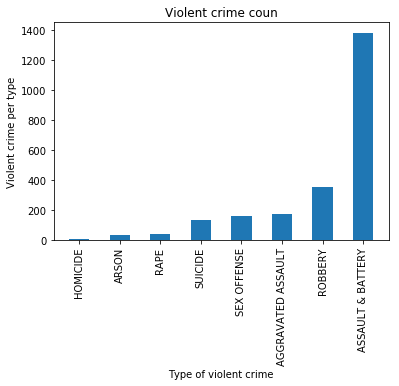

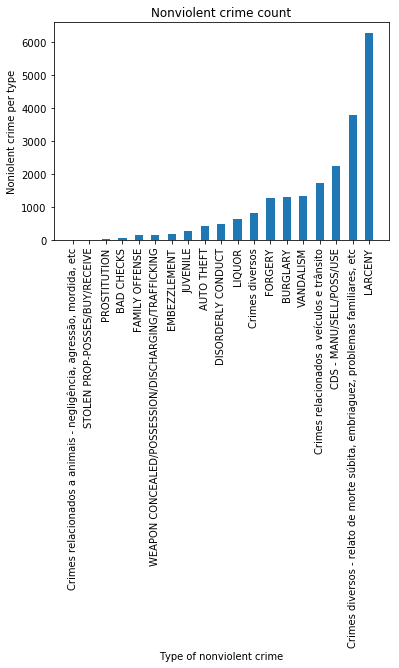

In [126]:
#É possível notar uma tendência dos crimes ao longo do ano, como observado nas figuras a seguir:
vc = pd.DataFrame.from_dict(Count_violent_type)
fig, ax = plt.subplots() 
bar_positions = arange(len(vc))
# Heights of the bars.  In our case, the average rating for the first movie in the dataset.
ax.bar(bar_positions, vc[1], 0.5)
tick_positions = range(0,len(vc))
ax.set_xticks(tick_positions)
ax.set_xticklabels(vc[0], rotation=90)
plt.xlabel("Type of violent crime")
plt.ylabel("Violent crime per type")
plt.title("Violent crime coun")
plt.show()

vc = pd.DataFrame.from_dict(Count_noviolent_type)
fig, ax = plt.subplots() 
bar_positions = arange(len(vc))
# Heights of the bars.  In our case, the average rating for the first movie in the dataset.
ax.bar(bar_positions, vc[1], 0.5)
tick_positions = range(0,len(vc))
ax.set_xticks(tick_positions)
ax.set_xticklabels(vc[0], rotation=90)
plt.xlabel("Type of nonviolent crime")
plt.ylabel("Noniolent crime per type")
plt.title("Nonviolent crime count")
plt.show()

In [73]:
#Parte 6
# variáveis de crimes violentos e não violentos são, respectivamente:  Coun_violent_crimes e Coun_nonviolent_crimes
#Where are the most violent crimes committed? How about nonviolent?
#PAra o caso, será um sistema de comparação para gerar uma coluna Booleana para servir de referência em uma contagem, onde cada Police District irá receber uma contagem por eventualidade de tipo de crime 


count_city_violent_crimes={}
count_city_noviolent_crimes={}
#Criando uma coluna com as posições de cada Police District de crimes
Colunm_Crimes_city={}
Colunm_Crimes_city["ROCKVILLE"]=((crimes['Police District Name']=="ROCKVILLE"))
Colunm_Crimes_city["BETHESDA"]=(crimes['Police District Name']=="BETHESDA")
Colunm_Crimes_city["SILVER SPRING"]=(crimes['Police District Name']=="SILVER SPRING")
Colunm_Crimes_city["WHEATON"]=(crimes['Police District Name']=="WHEATON")
Colunm_Crimes_city["GERMANTOWN"]=(crimes['Police District Name']=="GERMANTOWN")
Colunm_Crimes_city["MONTGOMERY VILLAGE"]=(crimes['Police District Name']=="MONTGOMERY VILLAGE")

#Funções para contagem de tipo de crime
def count_crimes_citys(a,b,c):
    count_city_violent_crimes = 0
    for x in range(a):
        if b[x]==c[x]:
            if c[x] == True:
                count_city_violent_crimes=count_city_violent_crimes+1
    return count_city_violent_crimes

def count_noviolent_crimes_citys(r,t,e):
    count_city_violent_no = 0
    for x in range(r):
        if t[x]==e[x]:
            if e[x] == True:
                count_city_violent_no=count_city_violent_no+1
    return count_city_violent_no

#chamando a função que realizará a contagem de crimes cada tipo de crime por Police District
num=len(Coun_violent_crimes)                
count_city_violent_crimes["ROCKVILLE"]=count_crimes_citys(num,Coun_violent_crimes, Colunm_Crimes_city["ROCKVILLE"])
count_city_violent_crimes["BETHESDA"]=count_crimes_citys(num,Coun_violent_crimes, Colunm_Crimes_city["BETHESDA"])
count_city_violent_crimes["SILVER SPRING"]=count_crimes_citys(num,Coun_violent_crimes, Colunm_Crimes_city["SILVER SPRING"])
count_city_violent_crimes["WHEATON"]=count_crimes_citys(num,Coun_violent_crimes, Colunm_Crimes_city["WHEATON"])
count_city_violent_crimes["GERMANTOWN"]=count_crimes_citys(num,Coun_violent_crimes, Colunm_Crimes_city["GERMANTOWN"])
count_city_violent_crimes["MONTGOMERY VILLAGE"]=count_crimes_citys(num,Coun_violent_crimes, Colunm_Crimes_city["MONTGOMERY VILLAGE"])

count_city_noviolent_crimes["ROCKVILLE"]=count_noviolent_crimes_citys(num,Coun_nonviolent_crimes, Colunm_Crimes_city["ROCKVILLE"])
count_city_noviolent_crimes["BETHESDA"]=count_noviolent_crimes_citys(num,Coun_nonviolent_crimes, Colunm_Crimes_city["BETHESDA"])
count_city_noviolent_crimes["SILVER SPRING"]=count_noviolent_crimes_citys(num,Coun_nonviolent_crimes, Colunm_Crimes_city["SILVER SPRING"])
count_city_noviolent_crimes["WHEATON"]=count_noviolent_crimes_citys(num,Coun_nonviolent_crimes, Colunm_Crimes_city["WHEATON"])
count_city_noviolent_crimes["GERMANTOWN"]=count_noviolent_crimes_citys(num,Coun_nonviolent_crimes, Colunm_Crimes_city["GERMANTOWN"])
count_city_noviolent_crimes["MONTGOMERY VILLAGE"]=count_noviolent_crimes_citys(num,Coun_nonviolent_crimes, Colunm_Crimes_city["MONTGOMERY VILLAGE"])

#reorganizando vetores contadores de crimes violentos e não violentos por Police District
count_city_noviolent_crimes=sorted(count_city_noviolent_crimes.items(), key=operator.itemgetter(1))
count_city_violent_crimes=sorted(count_city_violent_crimes.items(), key=operator.itemgetter(1))
print('"Violent" crimes per Police District: ' + str(count_city_violent_crimes))
print('')
print('"Nonviolent" crimes per Police District: ' + str(count_city_noviolent_crimes))
print('')
print('Police District with the most "Violent" crimes: ' + str(count_city_violent_crimes[len(count_city_violent_crimes)-1]))
print('')
print('Police District with the most "Nonviolent" crimes:' + str(count_city_noviolent_crimes[len(count_city_noviolent_crimes)-1]))




"Violent" crimes per Police District: [('GERMANTOWN', 874), ('BETHESDA', 944), ('ROCKVILLE', 1255), ('MONTGOMERY VILLAGE', 1281), ('WHEATON', 1458), ('SILVER SPRING', 1574)]

"Nonviolent" crimes per Police District: [('GERMANTOWN', 1881), ('ROCKVILLE', 2225), ('BETHESDA', 2439), ('MONTGOMERY VILLAGE', 2531), ('WHEATON', 2917), ('SILVER SPRING', 3959)]

Police District with the most "Violent" crimes: ('SILVER SPRING', 1574)

Police District with the most "Nonviolent" crimes:('SILVER SPRING', 3959)


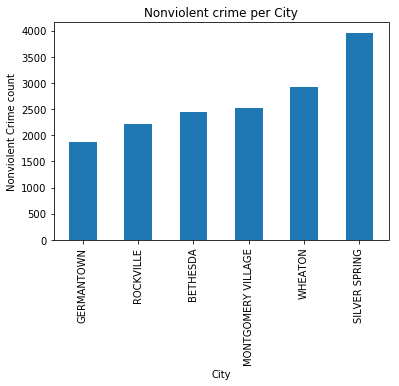

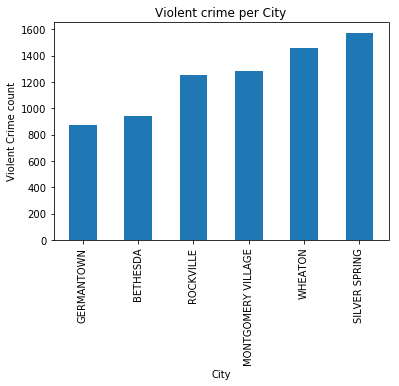

In [124]:
#A análise das informações demonstram regiões com maiores indices de cada tipo de crime, podendo ser encontrados ao longo de toda Montgomery
#podendo ser observada em:


vc = pd.DataFrame.from_dict(count_city_noviolent_crimes)
fig, ax = plt.subplots() 
bar_positions = arange(6)
# Heights of the bars.  In our case, the average rating for the first movie in the dataset.
ax.bar(bar_positions, vc[1], 0.5)
tick_positions = arange(0,6)
ax.set_xticks(tick_positions)
ax.set_xticklabels(vc[0], rotation=90)
plt.xlabel("City")
plt.ylabel("Nonviolent Crime count")
plt.title("Nonviolent crime per City")
plt.show()



vc = pd.DataFrame.from_dict(count_city_violent_crimes)
fig, ax = plt.subplots() 
bar_positions = arange(6) 
# Heights of the bars.  In our case, the average rating for the first movie in the dataset.
ax.bar(bar_positions, vc[1], 0.5)
tick_positions = arange(0,6) 
ax.set_xticks(tick_positions)
ax.set_xticklabels(vc[0], rotation=90)
plt.xlabel("City")
plt.ylabel("Violent Crime count")
plt.title("Violent crime per City")
plt.show()



In [125]:
#When are the most violent crimes committed? How about nonviolent?
crime_date={}
Count_violent_time={}
Count_noviolent_time={}
crime_date_month_violent={}
crime_date_month_noviolent={}
for x in range(1,13):
    crime_date_month_violent[x]=0
    crime_date_month_noviolent[x]=0
crime_date['months'] = pd.DatetimeIndex(d_time).month
for x in range(1,13):
    testmonth=(crime_date['months']==x)
    for z in range(0,len(testmonth)):
        if testmonth[z] == True:
            if crimes['Violent'][z] == 'Violent':
                crime_date_month_violent[x]=crime_date_month_violent[x]+1
            else:
                crime_date_month_noviolent[x]=crime_date_month_noviolent[x]+1
print(crime_date_month_violent)
print(crime_date_month_noviolent)

max_value = max(crime_date_month_violent.values())  # maximum value
max_vio = [k for k, v in crime_date_month_violent.items() if v == max_value] 
max_value = max(crime_date_month_noviolent.values())  # maximum value
max_novio = [k for k, v in crime_date_month_noviolent.items() if v == max_value] 

print('Month with the most "Violent" crimes: ' + str(max_vio))
print('Month with the most "Nonviolent" crimes: ' + str(max_novio))
#months=['Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','dez']



{1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 1083, 8: 1299, 9: 1305, 10: 1257, 11: 1251, 12: 1198}
{1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 2437, 8: 2703, 9: 2622, 10: 2818, 11: 2690, 12: 2706}
Month with the most "Violent" crimes: [9]
Month with the most "Nonviolent" crimes: [10]


**Seção 7**

In [75]:
# Suporte a gráficos
%matplotlib inline

In [76]:
# Gera uma Série do Pandas contendo as datas/horas de envio de policiais para cada ocorrência.
# Cada elemento da Série será do tipo datetime64[ns].
d_time = pd.to_datetime(crimes["Dispatch Date / Time"])

# Cria uma nova coluna no DataFrame, contendo os elementos
# da série d_time
crimes['Dispatch Date / Time (obj)'] = d_time

In [77]:
# Determina o dia da semana
def weekday_name(weekday):
    if weekday == 0:
        return 'Monday'
    elif weekday == 1:
        return 'Tuesday'
    elif weekday == 2:
        return 'Wednesday'
    elif weekday == 3:
        return 'Thursday'
    elif weekday == 4:
        return 'Friday'
    elif weekday == 5:
        return 'Saturday'
    elif weekday == 6:
        return 'Sunday'
    return 'Invalid'

def which_weekday_name(row):
    weekday = row['Dispatch Date / Time (obj)'].weekday()
    return weekday_name(weekday)

def which_weekday_num(row):
    return row['Dispatch Date / Time (obj)'].weekday()

# Cria uma nova coluna no DataFrame, contendo o nome do
# dia da semana para cada crime
weekday_names = crimes.apply(which_weekday_name, axis=1)
crimes['Dispatch Date / Time (weekday_name)'] = weekday_names

# Cria uma nova coluna no DataFrame, contendo o número do
# dia da semana para cada crime
weekday_numbers = crimes.apply(which_weekday_num, axis=1)
crimes['Dispatch Date / Time (weekday_num)'] = weekday_numbers

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
[1215, 1192, 1129, 1036, 1011, 905, 905]


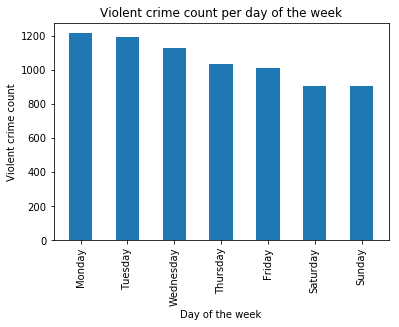

In [78]:
# Gráfico: Crimes violentos por dia da semana
vc = crimes.loc[crimes['Violent'] == 'Violent']['Dispatch Date / Time (weekday_num)'].value_counts()

sorted_keys = [ ]
for key in vc.keys():
    sorted_keys.append(key)
sorted_keys.sort()

x_axis = []
y_axis = []
for key in sorted_keys:
    x_axis.append(weekday_name(key))
    y_axis.append(vc.get(key))

print(str(x_axis) + '\n' + str(y_axis))

import matplotlib.pyplot as plt
from numpy import arange

bar_positions = arange(7) + 1
fig, ax = plt.subplots()
ax.bar(bar_positions, y_axis, 0.5)

tick_positions = arange(7) + 1
ax.set_xticks(tick_positions)

ax.set_xticklabels(x_axis, rotation=90)

plt.xlabel("Day of the week")
plt.ylabel("Violent crime count")
plt.title("Violent crime count per day of the week")

plt.show()

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
[2519, 2644, 2482, 2368, 2583, 1902, 1478]


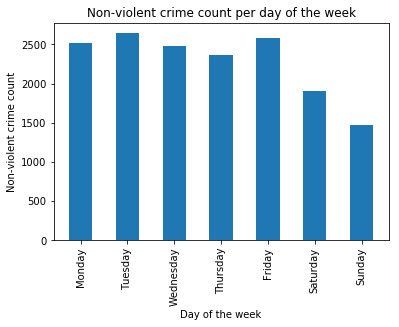

In [79]:
# Gráfico: Crimes não violentos por mês
vc = crimes.loc[crimes['Violent'] != 'Violent']['Dispatch Date / Time (weekday_num)'].value_counts()

sorted_keys = [ ]
for key in vc.keys():
    sorted_keys.append(key)
sorted_keys.sort()

x_axis = []
y_axis = []
for key in sorted_keys:
    x_axis.append(weekday_name(key))
    y_axis.append(vc.get(key))

print(str(x_axis) + '\n' + str(y_axis))

import matplotlib.pyplot as plt
from numpy import arange

bar_positions = arange(7) + 1
fig, ax = plt.subplots()
ax.bar(bar_positions, y_axis, 0.5)

tick_positions = arange(7) + 1
ax.set_xticks(tick_positions)

ax.set_xticklabels(x_axis, rotation=90)

plt.xlabel("Day of the week")
plt.ylabel("Non-violent crime count")
plt.title("Non-violent crime count per day of the week")

plt.show()

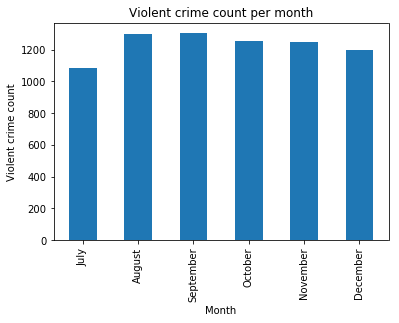

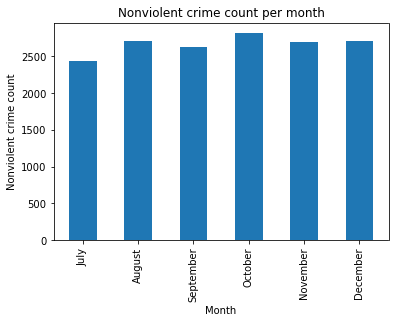

In [80]:
# Gráfico: Crimes não violentos e violentos por mês
# Determina mês
def month_name(month):
    if month == 1:
        return 'January'
    elif month == 2:
        return 'february'
    elif month == 3:
        return 'March'
    elif month == 4:
        return 'April'
    elif month == 5:
        return 'May'
    elif month == 6:
        return 'June'
    elif month == 7:
        return 'July'
    elif month == 8:
        return 'August'
    elif month == 9:
        return 'September'
    elif month == 10:
        return 'October'
    elif month == 11:
        return 'November'
    elif month == 12:
        return 'December'
    return 'Invalid'

def which_month_name(row):
    month = row['Dispatch Date / Time (obj)'].month
    return month_name(month)

def which_month_num(row):
    return row['Dispatch Date / Time (obj)'].month

# Cria uma nova coluna no DataFrame, contendo o nome do mês
month_names = crimes.apply(which_month_name, axis=1)
crimes['Dispatch Date / Time (month_name)'] = month_names

# Cria uma nova coluna no DataFrame, contendo o número mês
month_numbers = crimes.apply(which_month_num, axis=1)
crimes['Dispatch Date / Time (month_num)'] = month_numbers


vc = crimes.loc[crimes['Violent'] == 'Violent']['Dispatch Date / Time (month_num)'].value_counts()

sorted_keys = [ ]
for key in vc.keys():
    sorted_keys.append(key)
sorted_keys.sort()

x_axis = []
y_axis = []
for key in sorted_keys:
    x_axis.append(month_name(key))
    y_axis.append(vc.get(key))

#print(str(x_axis) + '\n' + str(y_axis))

import matplotlib.pyplot as plt
from numpy import arange

bar_positions = arange(len(vc)) + 1
fig, ax = plt.subplots()
ax.bar(bar_positions, y_axis, 0.5)

tick_positions = arange(len(vc)) + 1
ax.set_xticks(tick_positions)

ax.set_xticklabels(x_axis, rotation=90)

plt.xlabel("Month")
plt.ylabel("Violent crime count")
plt.title("Violent crime count per month")

plt.show()

vc = crimes.loc[crimes['Violent'] != 'Violent']['Dispatch Date / Time (month_num)'].value_counts()

sorted_keys = [ ]
for key in vc.keys():
    sorted_keys.append(key)
sorted_keys.sort()

x_axis = []
y_axis = []
for key in sorted_keys:
    x_axis.append(month_name(key))
    y_axis.append(vc.get(key))

#print(str(x_axis) + '\n' + str(y_axis))

import matplotlib.pyplot as plt
from numpy import arange

bar_positions = arange(len(vc)) + 1
fig, ax = plt.subplots()
ax.bar(bar_positions, y_axis, 0.5)

tick_positions = arange(len(vc)) + 1
ax.set_xticks(tick_positions)

ax.set_xticklabels(x_axis, rotation=90)

plt.xlabel("Month")
plt.ylabel("Nonviolent crime count")
plt.title("Nonviolent crime count per month")

plt.show()